# A Fingerprint Database Construction Method Based on Universal Kriging Interpolation for Outdoor Localization

In [1]:
import numpy as np
#%matplotlib notebook
import matplotlib. pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #空间三维画图
import warnings
warnings.filterwarnings("ignore")

## Sample Point Input

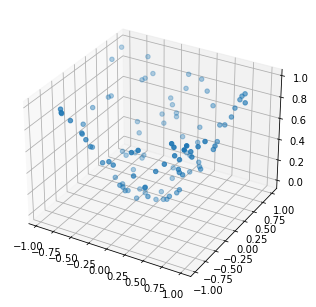

In [2]:
N = 100
x0 = np.random.rand(N)
y0 = np.random.rand(N)
x0 = x0*2-1
y0 = y0*2-1
z0 = np.sin(x0**2 + y0**2) + (np.random.rand(N)*2-1) * 0.01

fig = plt. figure()
ax = Axes3D (fig)
ax.scatter(x0, y0, z0)
plt.show()

## Linear interpolation

##  Inverse Distance Weighted

$$\omega = \frac{1/d_{ij}^2}{\sum_{i = 1}^K 1/ d_{ij}^2}$$
* $d_{ij} = \sqrt{(x - x_i)^2 + (y - y_i)^2}$

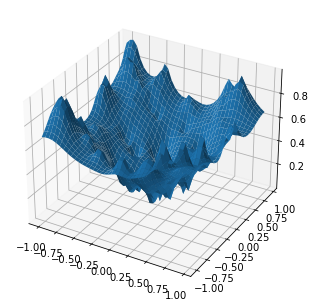

In [3]:
x1 = np. arange(-1, 1, 0.05)
y1 = np. arange(-1, 1, 0.05)
z1 = np. zeros((40, 40))

for r in range (40):
    for c in range(40):
        x = x1[r]
        y = y1[c]

        for i in range(N):
            d0 = 0
            
            for j in range(N): 
                d0 += 1/ ((x-x0[j])**2 + (y-y0[j])**2)
                
            d = (x - x0[i])**2 + (y - y0[i])**2
            w=(1/d)/(d0)
            z1[r,c]+=w * z0[i]

x1,y1 = np. meshgrid(x1, y1)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface (x1, y1, z1)
plt.show()

## Universal Kriging Interpolation

* 半方差函数 $\gamma(\boldsymbol x_i, \boldsymbol x_j) = \mathbb E \left(\left(Z(\boldsymbol x_i) - Z(\boldsymbol x_i)\right)^2\right)$
* 权值
    $$\left(\begin{matrix}ω_1 \\ ... \\ ω_n \\ \mu\end{matrix}\right) = \left(\begin{matrix}γ(x_1, x_1) & ... & γ(x_1, x_n) & 1 \\ ... & ... & ... & ... \\ γ(x_n, x_1) & ... & γ(x_n, x_n) & 1 \\ 1 & ... & 1 & 0 \end{matrix}\right)^{-1} \left(\begin{matrix}γ(x_1, x^*) \\ ... \\ γ(x_1, x^*) \\ 1\end{matrix}\right)$$
* 插值 $f(\boldsymbol x) = \sum_i \omega_i(x) f(\boldsymbol x_i)$


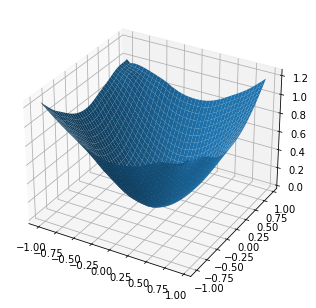

In [4]:
n=40
x1 = np. arange(-1, 1, 0.05)
y1 = np. arange(-1, 1, 0.05)
z1 = np. zeros ((n,n))

# Kriging
def variogram (x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

for r in range(n): 
    for c in range(n) :
        x =x1[r]
        y =y1[c]
        R0 = np.ones((N+1, N+1))
        R  = np.zeros(N+1)
        
        #RO
        R0[N,N] = 0
        for i in range(N):
            for j in range(N):
                R0[i,j] = variogram(x0[i], y0[i], x0[j], y0[j])

        # R
        R[N] = 1
        for i in range(N) :
            R[i] = variogram(x0[i],y0[i],x, y)
            
        #lamb
        lamb = np. matmul(np.linalg.inv(R0), R)
        for i in range(N) :
            z1[r,c] += lamb[i] * z0[i]
        z1[r,c] += lamb[N]
    
x1,y1 = np.meshgrid(x1,y1)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x1, y1, z1)
plt.show()